In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
%matplotlib inline

In [7]:
B = [0, 10]
A = [1, 10]
z   = signal.bilinear(B,A,100)

In [8]:
z

(array([0.04761905, 0.04761905]), array([ 1.       , -0.9047619]))

In [9]:
a=z[1]
b=z[0]

In [13]:
a=[1,-1.8432,0.843]
b=[0,9.846e-4,9.30447e-4]

In [17]:
t,y = signal.dstep((b,a,1/100),n=10)

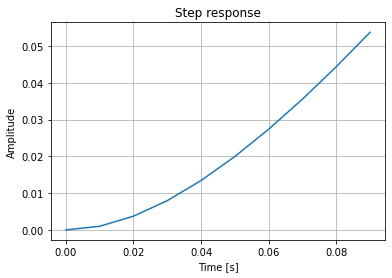

In [18]:
plt.plot(t,y[0])
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Step response')
plt.grid()

# Low Pass Filter

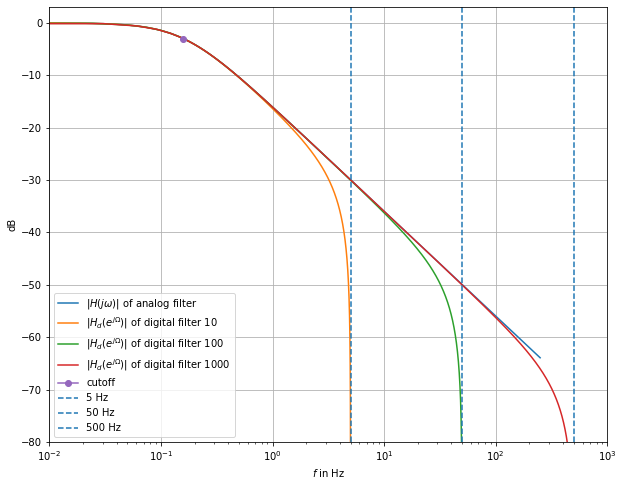

In [4]:


B = [0, 1]
A = [1, 1]

fs10= 10
fs100= 100
fs1000= 1000

fs10_z   = signal.bilinear(B,A,fs10)
fs100_z  = signal.bilinear(B,A,fs100)
fs1000_z = signal.bilinear(B,A,fs1000)

fs10_a  =fs10_z[1]
fs10_b  =fs10_z[0]

fs100_a =fs100_z[1]
fs100_b =fs100_z[0]

fs1000_a=fs1000_z[1]
fs1000_b=fs1000_z[0]
# displaying
plt.figure(figsize=(10, 8))
Om, fs10_Hd   = signal.freqz(fs10_b  , fs10_a, worN=1024)
f10 = Om * fs10 / (2 * np.pi)

Om, fs100_Hd  = signal.freqz(fs100_b , fs100_a, worN=2048)
f100 = Om * fs100 / (2 * np.pi)

Om, fs1000_Hd = signal.freqz(fs1000_b, fs1000_a, worN=16384) # 1000 Hz mesti lebih banyak sampelnya
f1000 = Om * fs1000 / (2 * np.pi)

tmp, H = signal.freqs(B, A, worN=f1000 * Om)
f = Om * f1000 / (2 * np.pi)

plt.semilogx(f, 20 * np.log10(np.abs(H)), label=r"$|H(j \omega)|$ of analog filter")
plt.semilogx(f10, 20 * np.log10(np.abs(fs10_Hd)), label=r"$|H_d(e^{j \Omega})|$ of digital filter 10")
plt.semilogx(f100, 20 * np.log10(np.abs(fs100_Hd)), label=r"$|H_d(e^{j \Omega})|$ of digital filter 100")
plt.semilogx(f1000, 20 * np.log10(np.abs(fs1000_Hd)), label=r"$|H_d(e^{j \Omega})|$ of digital filter 1000")
plt.semilogx(0.159, 20 * np.log10(0.707), marker='o',label="cutoff")

plt.axvline(x = 10/2,   linestyle="--", label = '5 Hz')
plt.axvline(x = 100/2,  linestyle="--", label = '50 Hz')
plt.axvline(x = 1000/2, linestyle="--", label = '500 Hz')
plt.xlabel(r"$f$ in Hz")
plt.ylabel(r"dB")
plt.axis([0.01, 1000, -80, 3])
plt.legend()
plt.grid()
plt.savefig("first-order.jpg",dpi=200)
# https://www.geeksforgeeks.org/plot-a-vertical-line-in-matplotlib/

In [5]:
fs10_z

(array([0.04761905, 0.04761905]), array([ 1.       , -0.9047619]))

In [74]:
lti = signal.lti([1],A)
t,y = signal.step(lti)
# hitung sinyal fs=10 Hz
fs10_dt,fs10_dy = signal.dstep((fs10_b,fs10_a,1/fs10),n=70)

# hitung sinyal fs=100 Hz
fs100_dt,fs100_dy = signal.dstep((fs100_b,fs100_a,1/fs100),n=700)

# hitung sinyal fs=1000 Hz
fs1000_dt,fs1000_dy = signal.dstep((fs1000_b,fs1000_a,1/fs1000),n=7000)

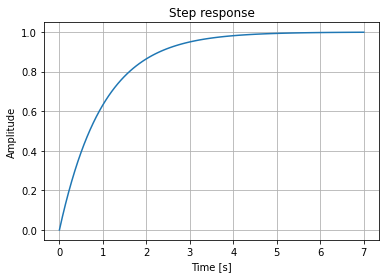

In [75]:
plt.plot(t,y)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Step response')
plt.grid()

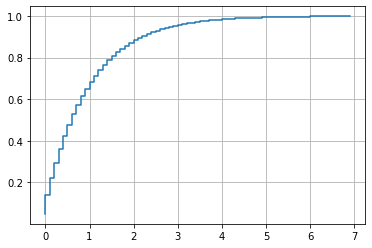

In [76]:
plt.step(fs10_dt,fs10_dy[0])
plt.grid()

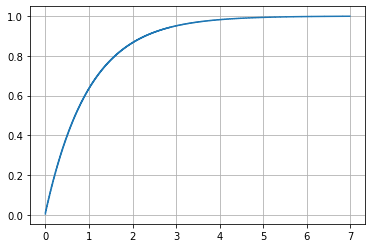

In [77]:
plt.step(fs100_dt,fs100_dy[0])
plt.grid()

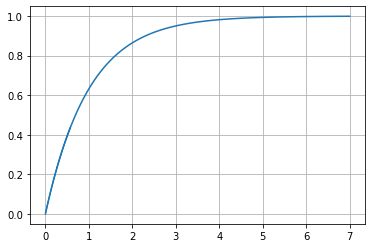

In [78]:
plt.step(fs1000_dt,fs1000_dy[0])
plt.grid()

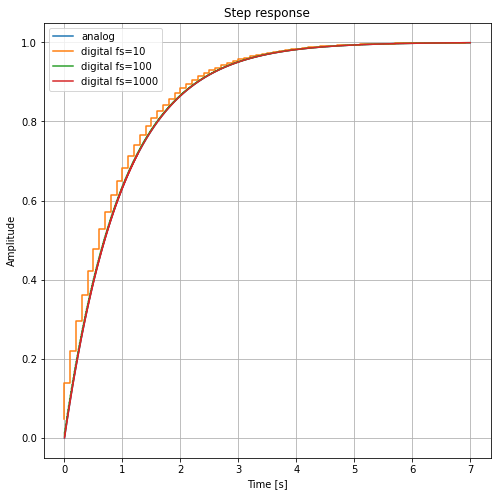

In [79]:
plt.figure(figsize=(8, 8))
lti = signal.lti([1],A)
t,y = signal.step(lti)
plt.plot(t,y, label='analog')
plt.step(fs10_dt,fs10_dy[0],label = 'digital fs=10')
plt.step(fs100_dt,fs100_dy[0],label = 'digital fs=100')
plt.step(fs1000_dt,fs1000_dy[0],label = 'digital fs=1000')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Step response')
plt.legend()
plt.grid()
plt.savefig("bilinear-LPF-1st-order-step-response.jpg",dpi=200)

# High Pass Filter

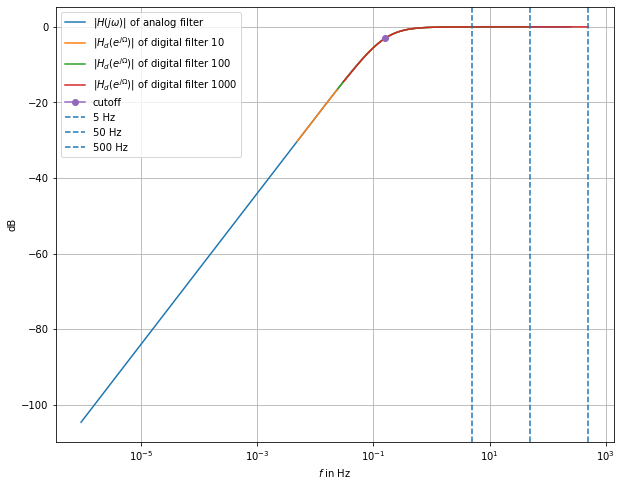

In [25]:
np.seterr(divide = 'ignore') 

B = [1, 0]
A = [1, 1]

fs10= 10
fs100= 100
fs1000= 1000

fs10_z   = signal.bilinear(B,A,fs10)
fs100_z  = signal.bilinear(B,A,fs100)
fs1000_z = signal.bilinear(B,A,fs1000)

fs10_a  =fs10_z[1]
fs10_b  =fs10_z[0]

fs100_a =fs100_z[1]
fs100_b =fs100_z[0]

fs1000_a=fs1000_z[1]
fs1000_b=fs1000_z[0]
# displaying
plt.figure(figsize=(10, 8))
Om, fs10_Hd   = signal.freqz(fs10_b  , fs10_a, worN=1024)
f10 = Om * fs10 / (2 * np.pi)

Om, fs100_Hd  = signal.freqz(fs100_b , fs100_a, worN=2048)
f100 = Om * fs100 / (2 * np.pi)

Om, fs1000_Hd = signal.freqz(fs1000_b, fs1000_a, worN=16384) # 1000 Hz mesti lebih banyak sampelnya
f1000 = Om * fs1000 / (2 * np.pi)

tmp, H = signal.freqs(B, A, worN=f1000 * Om)
f = Om * f1000 / (2 * np.pi)

plt.semilogx(f, 20 * np.log10(np.abs(H)), label=r"$|H(j \omega)|$ of analog filter")
plt.semilogx(f10, 20 * np.log10(np.abs(fs10_Hd)), label=r"$|H_d(e^{j \Omega})|$ of digital filter 10")
plt.semilogx(f100, 20 * np.log10(np.abs(fs100_Hd)), label=r"$|H_d(e^{j \Omega})|$ of digital filter 100")
plt.semilogx(f1000, 20 * np.log10(np.abs(fs1000_Hd)), label=r"$|H_d(e^{j \Omega})|$ of digital filter 1000")
plt.semilogx(0.159, 20 * np.log10(0.707), marker='o',label="cutoff")

plt.axvline(x = 10/2,   linestyle="--", label = '5 Hz')
plt.axvline(x = 100/2,  linestyle="--", label = '50 Hz')
plt.axvline(x = 1000/2, linestyle="--", label = '500 Hz')
plt.xlabel(r"$f$ in Hz")
plt.ylabel(r"dB")
#plt.axis([0.01, 1000, -80, 3])
plt.legend()
plt.grid()
plt.savefig("first-order.jpg",dpi=200)
# https://www.geeksforgeeks.org/plot-a-vertical-line-in-matplotlib/

<ipython-input-20-ced2f45c18c7>:1: RuntimeWarning: divide by zero encountered in log10
  plt.semilogx(f, 20 * np.log10(np.abs(H)), label=r"$|H(j \omega)|$ of analog filter")


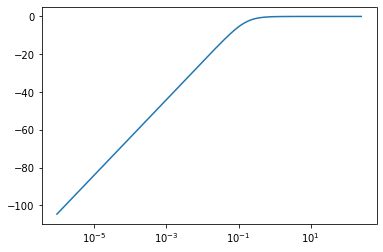

In [20]:
plt.semilogx(f, 20 * np.log10(np.abs(H)), label=r"$|H(j \omega)|$ of analog filter")

<ipython-input-21-6aaabd75c6d1>:1: RuntimeWarning: divide by zero encountered in log10
  plt.semilogx(f10, 20 * np.log10(np.abs(fs10_Hd)), label=r"$|H_d(e^{j \Omega})|$ of digital filter 10")


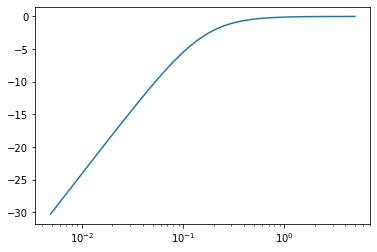

In [21]:
plt.semilogx(f10, 20 * np.log10(np.abs(fs10_Hd)), label=r"$|H_d(e^{j \Omega})|$ of digital filter 10")


In [22]:
fs10_Hd

array([0.00000000e+00+0.00000000e+00j, 9.40355199e-04+3.06507901e-02j,
       3.75085702e-03+6.11292736e-02j, ...,
       9.99999947e-01+2.30098730e-04j, 9.99999976e-01+1.53398556e-04j,
       9.99999994e-01+7.66990991e-05j])

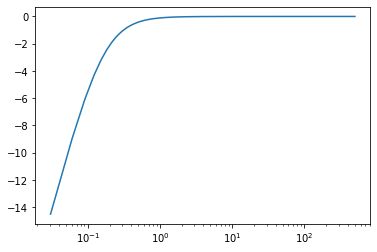

In [26]:
plt.semilogx(f1000, 20 * np.log10(np.abs(fs1000_Hd)), label=r"$|H_d(e^{j \Omega})|$ of digital filter 1000")


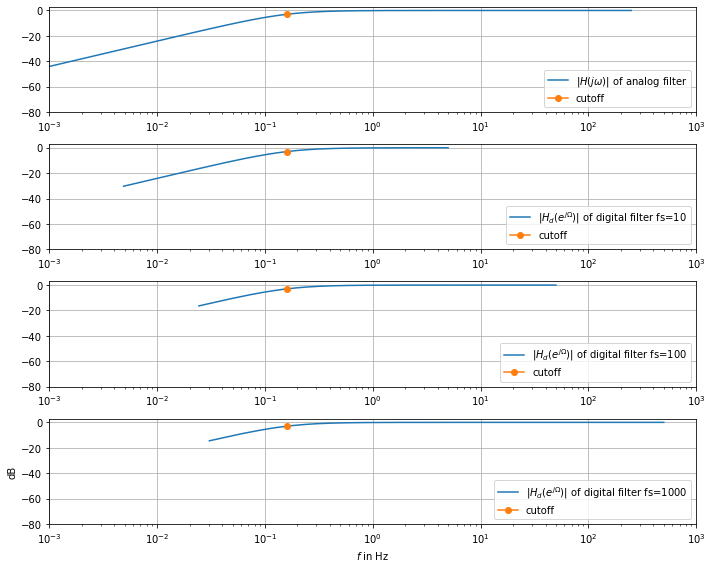

In [69]:
figure, axis = plt.subplots(4, 1, figsize=(10, 8)) 

ax0 = axis[0]
ax0.semilogx(f, 20 * np.log10(np.abs(H)), label=r"$|H(j \omega)|$ of analog filter")
ax0.semilogx(0.159, 20 * np.log10(0.707), marker='o',label="cutoff")
ax0.legend(loc='lower right')
ax0.axis([0.001, 1000, -80, 3])
plt.xlabel(r"$f$ in Hz")
plt.ylabel(r"dB")
ax0.grid(True)
figure.tight_layout()

ax1 = axis[1]
ax1.semilogx(f10, 20 * np.log10(np.abs(fs10_Hd)), label=r"$|H_d(e^{j \Omega})|$ of digital filter fs=10")
ax1.semilogx(0.159, 20 * np.log10(0.707), marker='o',label="cutoff")
ax1.legend(loc='lower right')
ax1.axis([0.001, 1000, -80, 3])
ax1.grid(True)
figure.tight_layout()

ax2 = axis[2]
ax2.semilogx(f100, 20 * np.log10(np.abs(fs100_Hd)), label=r"$|H_d(e^{j \Omega})|$ of digital filter fs=100")
ax2.semilogx(0.159, 20 * np.log10(0.707), marker='o',label="cutoff")
ax2.legend(loc='lower right')
ax2.axis([0.001, 1000, -80, 3])
ax2.grid(True)
figure.tight_layout()

ax3 = axis[3]
ax3.semilogx(f1000, 20 * np.log10(np.abs(fs1000_Hd)), label=r"$|H_d(e^{j \Omega})|$ of digital filter fs=1000")
ax3.semilogx(0.159, 20 * np.log10(0.707), marker='o',label="cutoff")
ax3.legend(loc='lower right')
ax3.axis([0.001, 1000, -80, 3])
ax3.grid(True)
figure.tight_layout()
plt.savefig("bilinear-HPF-1st-order-frequency-response.jpg",dpi=200)



In [58]:
# step response untuk HPF

In [61]:
lti = signal.lti([1,0],A)
t,y = signal.step(lti)
# hitung sinyal fs=10 Hz
fs10_dt,fs10_dy = signal.dstep((fs10_b,fs10_a,1/fs10),n=70)

# hitung sinyal fs=100 Hz
fs100_dt,fs100_dy = signal.dstep((fs100_b,fs100_a,1/fs100),n=700)

# hitung sinyal fs=1000 Hz
fs1000_dt,fs1000_dy = signal.dstep((fs1000_b,fs1000_a,1/fs1000),n=7000)

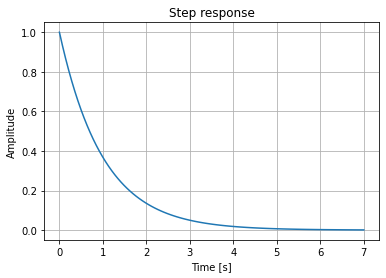

In [62]:
plt.plot(t,y)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Step response')
plt.grid()

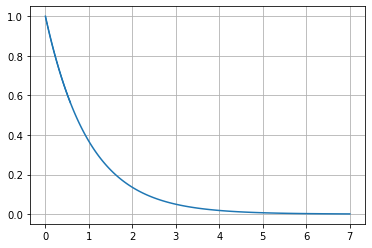

In [63]:
plt.step(fs1000_dt,fs1000_dy[0])
plt.grid()

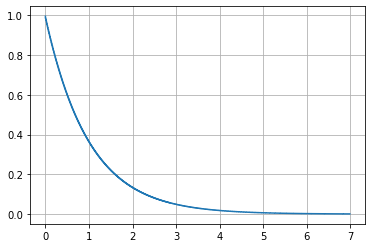

In [64]:
plt.step(fs100_dt,fs100_dy[0])
plt.grid()

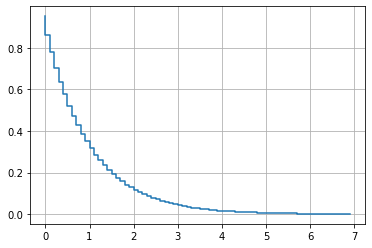

In [65]:
plt.step(fs10_dt,fs10_dy[0])
plt.grid()

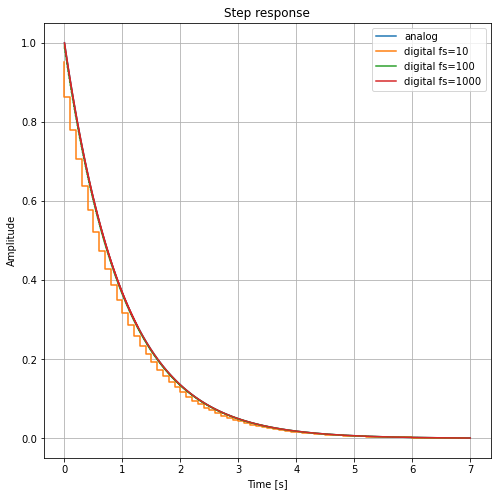

In [68]:
plt.figure(figsize=(8, 8))
lti = signal.lti([1,0],A)
t,y = signal.step(lti)
plt.plot(t,y, label='analog')
plt.step(fs10_dt,fs10_dy[0],label = 'digital fs=10')
plt.step(fs100_dt,fs100_dy[0],label = 'digital fs=100')
plt.step(fs1000_dt,fs1000_dy[0],label = 'digital fs=1000')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Step response')
plt.legend()
plt.grid()
plt.savefig("bilinear-HPF-1st-order-step-response.jpg",dpi=200)